Linear Regression with pytorch

1. Y1 = x^4 + x^2 , Y2 = x^2 + x 이렇게 두 함수 Y1, Y2 를 fitting 합니다.

2. 학습 조건
(1) 학습 데이터 X 는 총 1000개 ( 범위 : - 5 ~ 5, uniform distribution )
(2) x 에 normal distribution ( std = 2 ) 의 noise 추가
(3) 손실함수 : L2 loss function
(4) Epoch : 500
(5) 최적화함수 : SGD ( learning rate = 0.01 )
è Y1, Y2 두 함수 중 어느 함수가 더 최적화가 빨리 되나요 ? ( 코드 내에 주석으로 달아줍니
다 )
è 꼭 jupyter notebook 을 사용하지 않아도 좋습니다
è 코드는 앞서 생성한 팀별 github repository 에 업로드 하여 공유해주세요

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dir(torch.nn)
# L1 함수는 L1Loss, L2 함수는 MSELoss

In [3]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data,1),-5,5)
# print(x.size())
noise = init.normal_(torch.FloatTensor(num_data,1),std=2)
y1 = 2*x**4+x**2
y2 = x**2 + x
y1_noise = 2*(x+noise)**4+(x+noise)**2
y2_noise = (x+noise)**2 + (x+noise)

In [4]:
# model = nn.Linear(in_features=1,out_features=1)
model = nn.Linear(1,1)
loss_func = nn.MSELoss()

In [5]:
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(),lr=0.01)

## y1 함수

In [6]:
label = y1_noise
losses = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
    losses.append(loss.data.cpu())
# param_list=list(model.parameters())
# print(param_list[0].item(),param_list[1].item())

tensor(3845828.2500)
tensor(3645113.)
tensor(3511105.)
tensor(3421625.7500)
tensor(3361879.)
tensor(3321984.5000)
tensor(3295346.2500)
tensor(3277559.2500)
tensor(3265682.5000)
tensor(3257752.2500)
tensor(3252457.)
tensor(3248921.2500)
tensor(3246560.5000)
tensor(3244984.2500)
tensor(3243931.5000)
tensor(3243228.5000)
tensor(3242759.2500)
tensor(3242446.)
tensor(3242236.7500)
tensor(3242097.)
tensor(3242004.)
tensor(3241940.7500)
tensor(3241899.5000)
tensor(3241872.2500)
tensor(3241854.)
tensor(3241840.7500)
tensor(3241832.2500)
tensor(3241827.)
tensor(3241823.5000)
tensor(3241821.2500)
tensor(3241819.7500)
tensor(3241818.2500)
tensor(3241817.5000)
tensor(3241817.)
tensor(3241816.7500)
tensor(3241817.)
tensor(3241816.)
tensor(3241816.5000)
tensor(3241815.7500)
tensor(3241816.5000)
tensor(3241816.2500)
tensor(3241816.)
tensor(3241816.)
tensor(3241816.)
tensor(3241816.2500)
tensor(3241815.7500)
tensor(3241816.5000)
tensor(3241816.2500)
tensor(3241816.)
tensor(3241816.)


In [7]:
num_test_data = 1000
test_data = init.uniform_(torch.Tensor(num_test_data,1),-5,5)

# print(test_data, model(test_data))

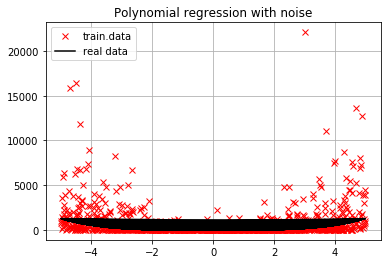

In [8]:
plt.plot(x.data,y1_noise.data,'rx')
plt.plot(x.data,y1.data,'k-')
plt.legend(['train.data','real data'])
plt.title('Polynomial regression with noise')
plt.grid(True)
plt.show()

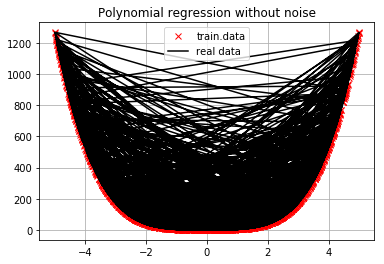

In [9]:
plt.plot(x.data,y1.cpu().data,'rx')
plt.plot(x.data,y1.data,'k-')
plt.legend(['train.data','real data'])
plt.title('Polynomial regression without noise')
plt.grid(True)
plt.show()

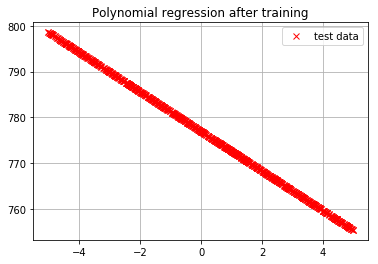

In [10]:
plt.plot(test_data.data,model(test_data).data,'rx') 
plt.legend(['test data','real data'])
plt.title('Polynomial regression after training')
plt.grid(True)
plt.show()

## y2 함수

In [11]:
label = y2_noise
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
param_list=list(model.parameters())
print(param_list[0].item(),param_list[1].item())

tensor(584062.2500)
tensor(390063.9062)
tensor(260528.5625)
tensor(174035.2656)
tensor(116281.9219)
tensor(77718.8281)
tensor(51969.4688)
tensor(34776.1016)
tensor(23295.7402)
tensor(15630.0723)
tensor(10511.5439)
tensor(7093.8013)
tensor(4811.7051)
tensor(3287.9043)
tensor(2270.4294)
tensor(1591.0417)
tensor(1137.4006)
tensor(834.4952)
tensor(632.2393)
tensor(497.1886)
tensor(407.0126)
tensor(346.8002)
tensor(306.5952)
tensor(279.7495)
tensor(261.8241)
tensor(249.8549)
tensor(241.8628)
tensor(236.5264)
tensor(232.9631)
tensor(230.5839)
tensor(228.9952)
tensor(227.9344)
tensor(227.2261)
tensor(226.7531)
tensor(226.4373)
tensor(226.2265)
tensor(226.0857)
tensor(225.9917)
tensor(225.9289)
tensor(225.8869)
tensor(225.8589)
tensor(225.8403)
tensor(225.8278)
tensor(225.8195)
tensor(225.8139)
tensor(225.8102)
tensor(225.8077)
tensor(225.8061)
tensor(225.8049)
tensor(225.8042)
0.8731885552406311 12.74748420715332


In [12]:
num_test_data = 1000
model = model.cpu()
test_data = init.uniform_(torch.Tensor(num_test_data,1),-5,5)
# print(test_data, model(test_data))

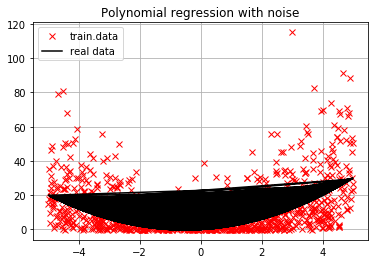

In [13]:
x = x.cpu()
plt.plot(x.data,y2_noise.cpu().data,'rx')
plt.plot(x.data,y2.data,'k-')
plt.legend(['train.data','real data'])
plt.title('Polynomial regression with noise')
plt.grid(True)
plt.show()

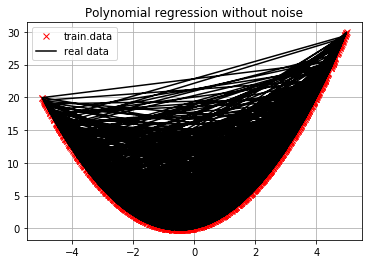

In [14]:
plt.plot(x.data,y2.data,'rx')
plt.plot(x.data,y2.data,'k-')
plt.legend(['train.data','real data'])
plt.title('Polynomial regression without noise')
plt.grid(True)
plt.show()

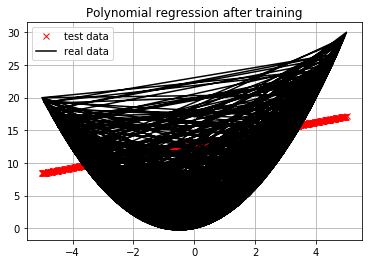

In [18]:
plt.plot(test_data.data,model(test_data).data,'rx') 
plt.plot(test_data.data,(test_data)**2 + (test_data),'k-')
plt.legend(['test data','real data'])
plt.title('Polynomial regression after training')
plt.grid(True)
plt.show()

결론 : 최적화는 y1보다 y2가 더 빨리되고 잘 된다. 그리고 y1은 gradient의 오류로 나중에가면 방향을 잃어 제자리를 도는 모습을 보이지만, y2는 잘 일어나고 있다. training파트가 잘 이해가 안된다 ㅠㅠ